<a href="https://colab.research.google.com/github/Rosharma307/health_insurance_cross_sell_pridiction/blob/main/health_insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Health insurance cross sell prediction
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if. God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called 'sum assured') to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.



### kNOW YOUR DATA

In [3]:
# IMPORTING libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split   # for splitting the data into training and testing part
from sklearn.preprocessing import StandardScaler  # for scaling features
from google.colab import drive

In [3]:
# connecting drive
drive.mount('/content/drive')


MessageError: ignored

In [4]:
# load data
df = pd.read_csv("/content/drive/MyDrive/ALMABETTER/Datasets/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [5]:
# First look
df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
# rows and cloumn count
df.shape

(381109, 12)

### Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [8]:
# checking for duplicate values
data = df.drop_duplicates(subset=['id'])

# Print the number of duplicated rows removed
print("Removed", len(df) - len(data), "duplicated rows")

Removed 0 duplicated rows


In [9]:
# checking for missing values
# Remove rows with null or NaN values
data.dropna(inplace=True)

# Reset the index after removing rows
data.reset_index(drop=True, inplace=True)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", data.shape)

Shape of the cleaned dataset: (381109, 12)


###Observations:
#### Their is no null as well as duplicate values are present in our dataset

###Outlier Detection:


<ipython-input-10-28626850c791>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1][0],x = data['Annual_Premium'])
<ipython-input-10-28626850c791>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1][1],x = data['Age'])
<ipython-input-10-28626850c791>:31: UserWarning: 

`dis

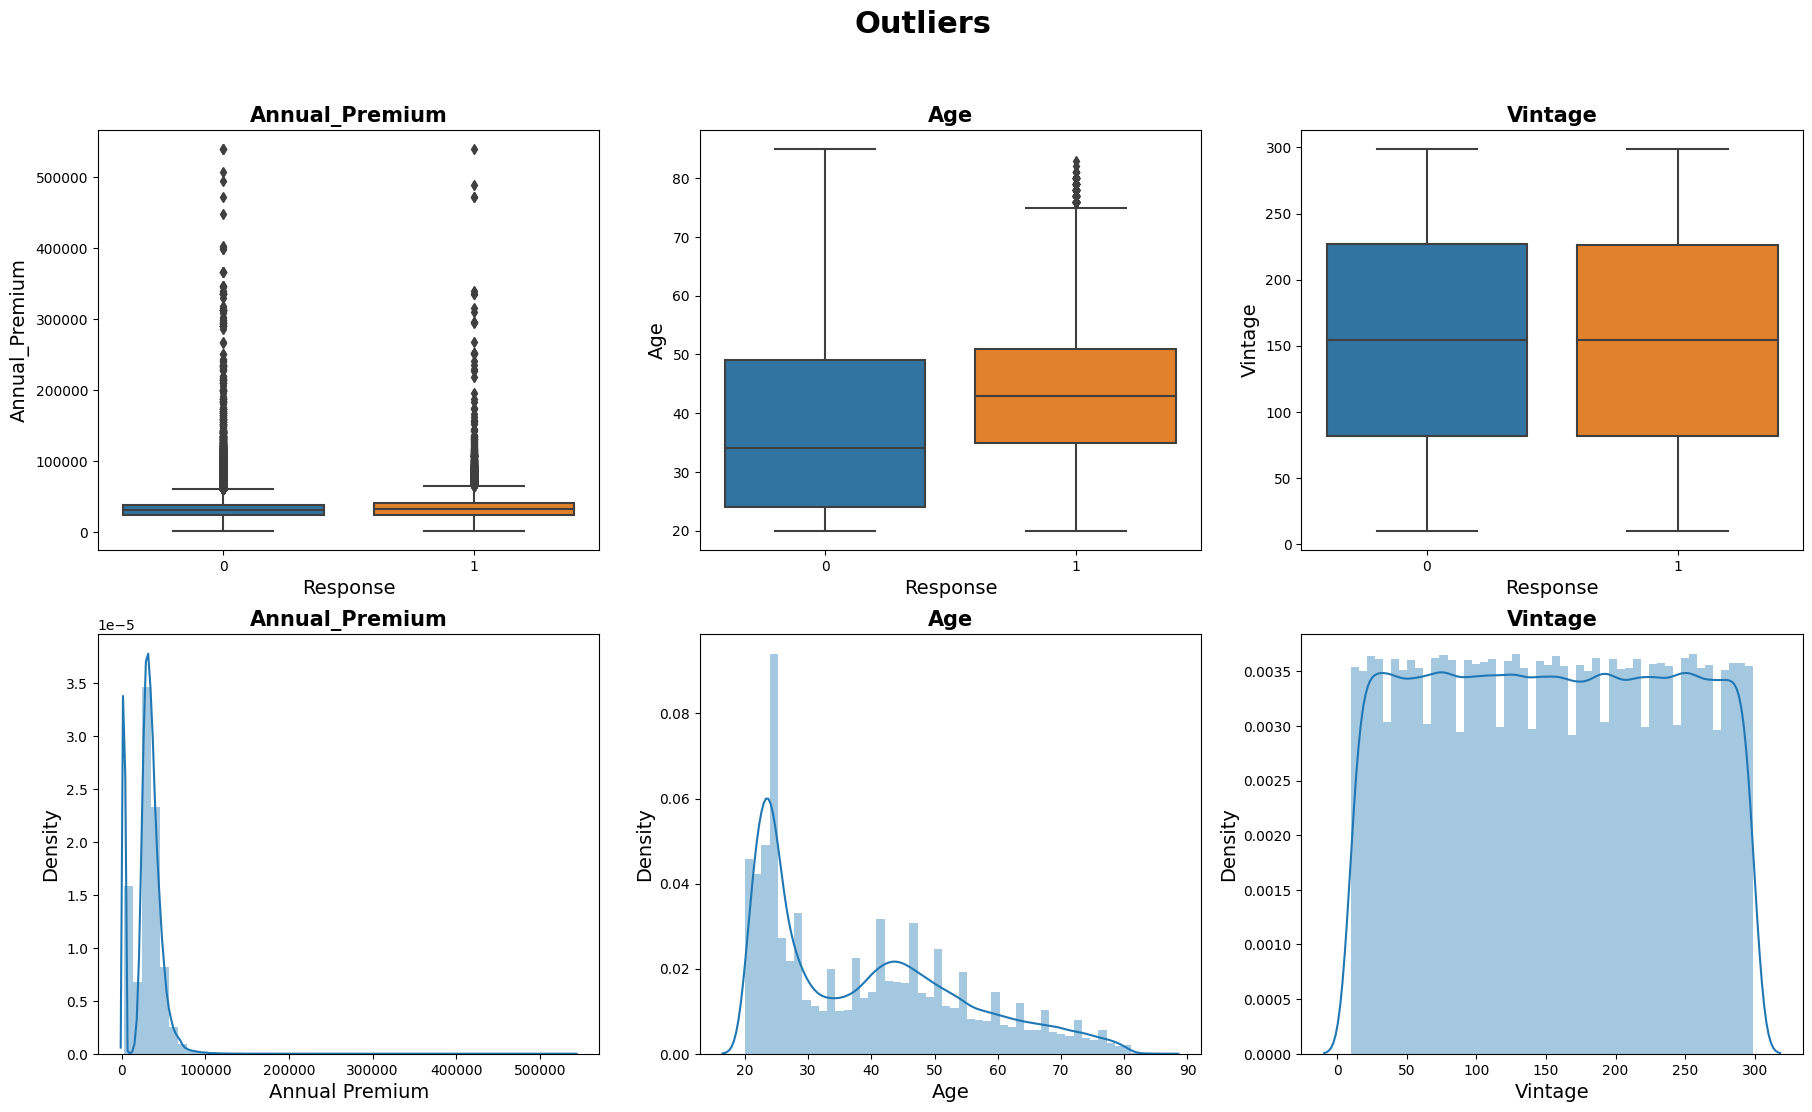

In [10]:
def show_outliers(data):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = data)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = data)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = data)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = data['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = data['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = data['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(data)

###Observation:
#### 1. Annual_premium is positively skewed(most of the customer pays under 100000).
#### 2.  vinatage has uniform distribution.
#### 3. Age has some outliers but that can be ignored.

###Outlier Treatment
#### using quartile mwthod.

In [11]:
def outlier_treatment(data):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    data['Annual_Premium_Treated'] = np.where(data['Annual_Premium']>Upper_Whisker, Upper_Whisker, data['Annual_Premium'])
outlier_treatment(data)
'''def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))
scale_features(data_df) '''

"def scale_features(df):\n    scaler = MinMaxScaler()\n\n    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))\n    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))\nscale_features(data_df) "

<ipython-input-12-528753fe46b2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1], x = data['Annual_Premium_Treated'], color='brown')


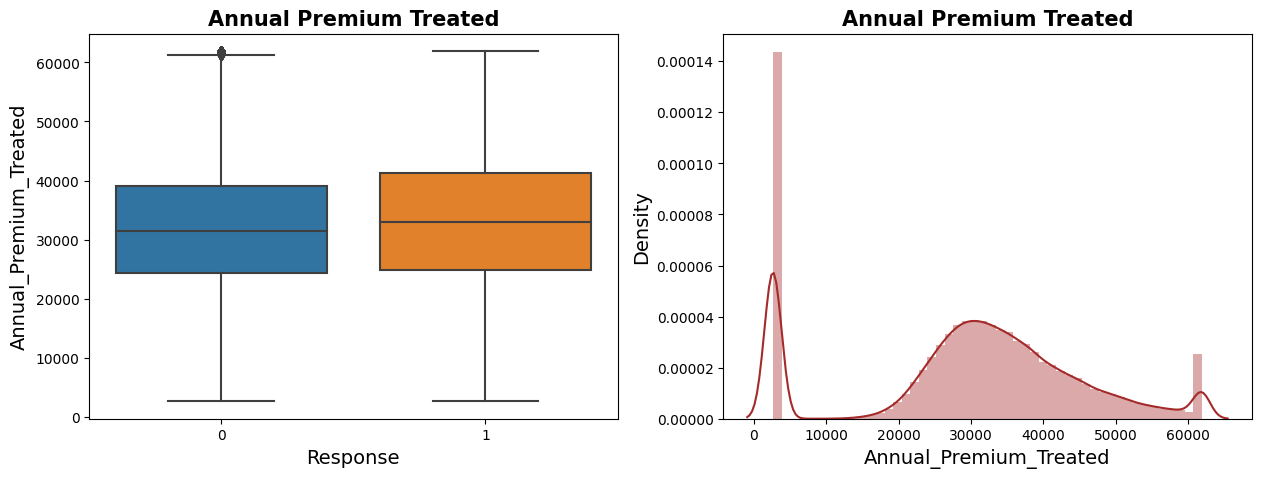

In [12]:
def show_ann_prem_outliers(data):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = data)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = data['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(data)

# Exploratory Data Analysis

### Understanding your data variables

In [13]:
# dataset columns
columns =  data.columns
columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Annual_Premium_Treated'],
      dtype='object')

In [14]:
# decribe our data
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,30148.169353
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,15476.398118
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,2630.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,24405.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,31669.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,39400.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,61892.500000


In [15]:
# Check unique values for each variables
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values in column "{column}": {unique_values}')

Unique values in column "id": [     1      2      3 ... 381107 381108 381109]
Unique values in column "Gender": ['Male' 'Female']
Unique values in column "Age": [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
Unique values in column "Driving_License": [1 0]
Unique values in column "Region_Code": [28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]
Unique values in column "Previously_Insured": [0 1]
Unique values in column "Vehicle_Age": ['> 2 Years' '1-2 Year' '< 1 Year']
Unique values in column "Vehicle_Damage": ['Yes' 'No']
Unique values in column "Annual_Premium": [ 40454  33536  38294 ...  20706 101664  69845]
Unique values in column "Policy_Sales_Channel": [ 26 152 160 124  14  13  30 156 163 157 122  19  22  15 154  16  

## Data wrangling

#### Since their is no duplicates and missing values so we dont have to clean our data

In [16]:
# Define numerical and categorical columns
numerical_columns = ['id', 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
categorical_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage' ]

# Create new DataFrames with the selected columns
df_numerical = data[numerical_columns]
df_categorical = data[categorical_columns]


In [17]:
df_categorical.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


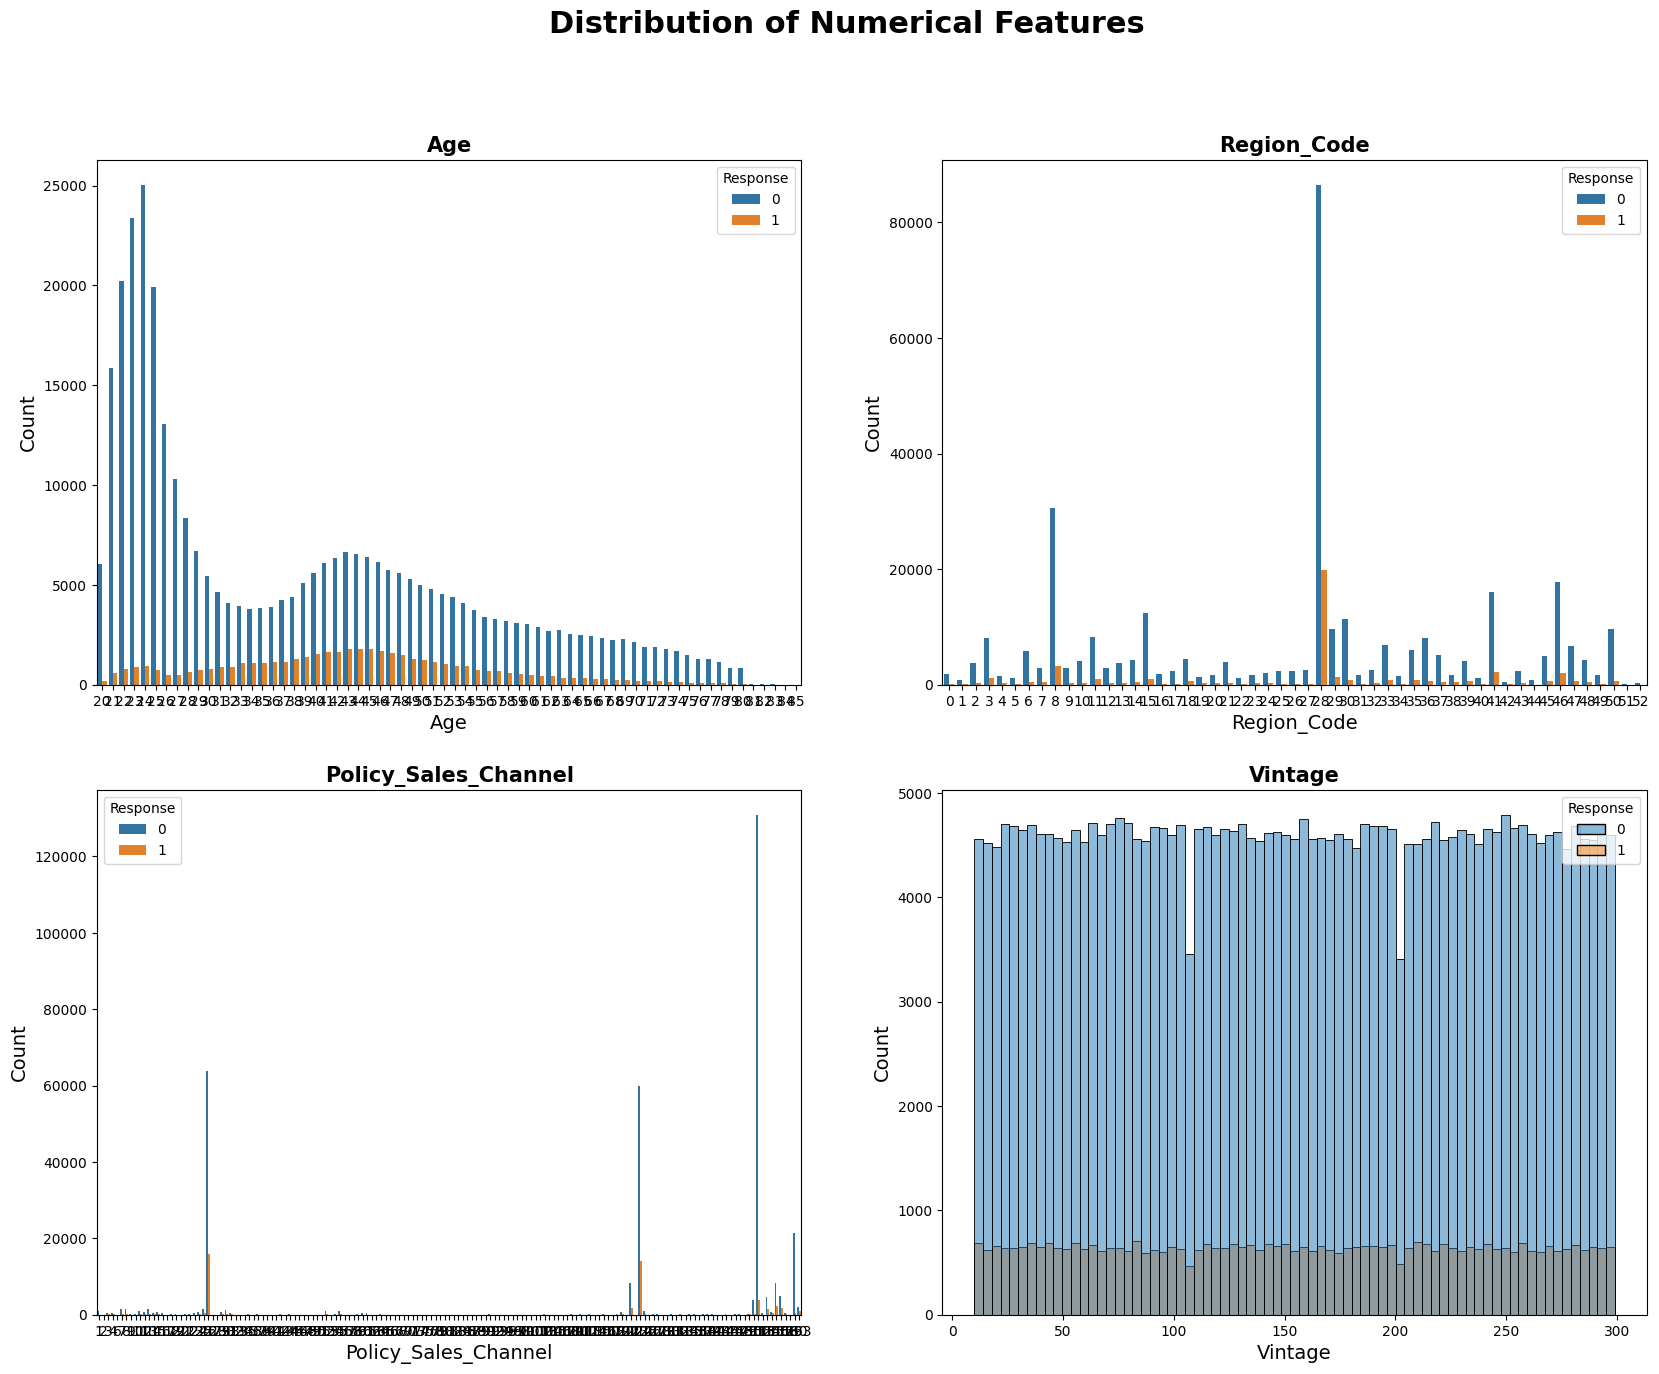

In [18]:
def show_distribution_numerical_features(data):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = data, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = data, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = data, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = data['Vintage'],data = data, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})



    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )
show_distribution_numerical_features(data)

###Observation:
#####In above charts we can see their is high dispersion in age, Policy_sales_channel and regional_code.Hence it is better to convert them into categorical variable for better understanding.
##### vintage is uniform throughout the data so their is no need to change it.

####Conversion numerical to categorical:


In [19]:
  # Categorizing Age feature
data['Age_Group'] = data['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

# Categorizing Policy_Sales_Channel feature
x = data['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D')
res = dict(zip(x.keys(),x.values))
data['Policy_Sales_Channel_Categorical'] = data['Policy_Sales_Channel'].map(res)

# Categorizing Region Code feature
x = data['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
res = dict(zip(x.keys(),x.values))
data['Region_Code_Categorical'] = data['Region_Code'].map(res)




### After conversion distribution:

Text(0.5, 0.98, 'Distribution of Categorical Features')

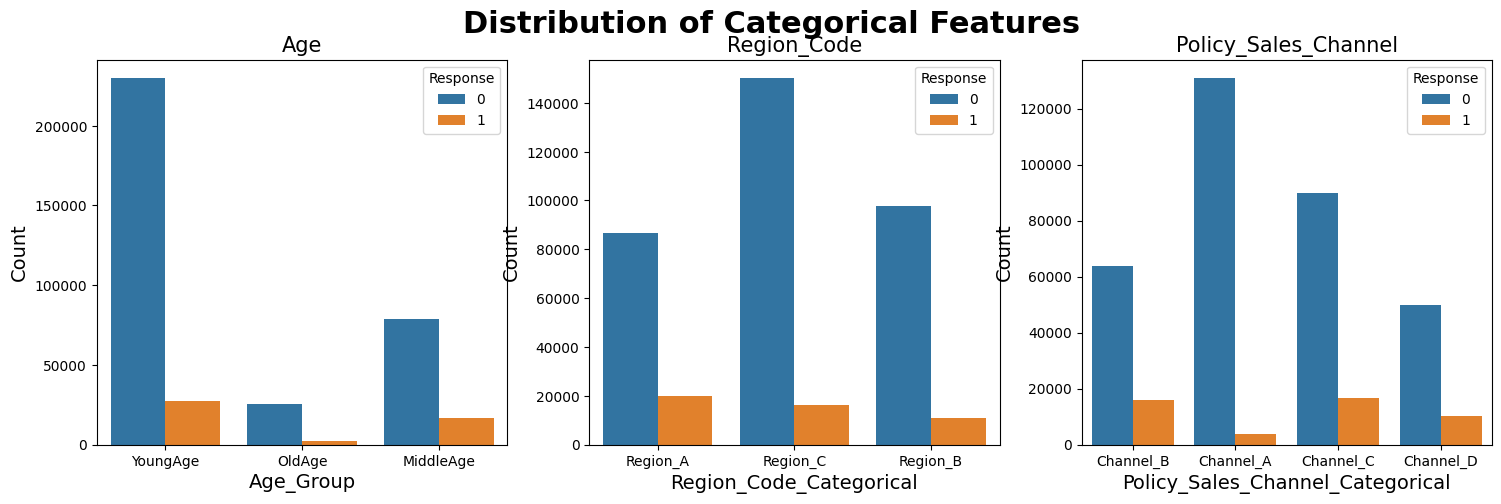

In [20]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.countplot(ax = axes[0],x = 'Age_Group', data = data, hue='Response')
axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[0].set_title('Age', fontdict={'fontsize': 15})

sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = data, hue='Response')
axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = data, hue='Response')
axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )



### 1. Gender relation with other variables:

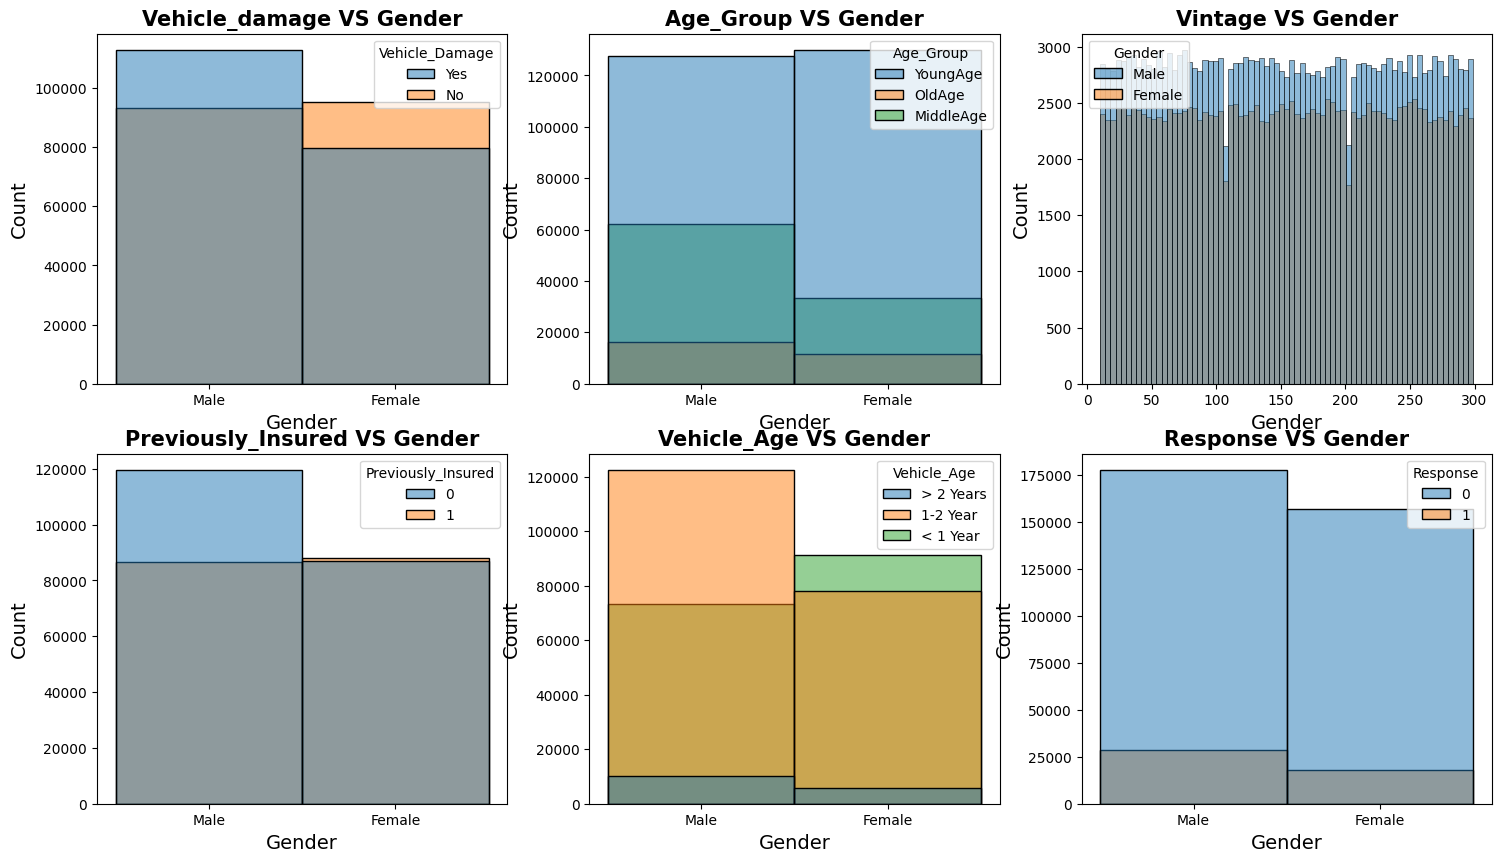

In [27]:
def gender_distribution(data):
  fig, axes = plt.subplots(2,3, figsize=(18,10))
  sns.histplot(ax=axes[0][0], x=data['Gender'], data=data, hue='Vehicle_Damage')
  axes[0][0].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0][0].set_title('Vehicle_damage VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[0][1], x=data['Gender'], data=data, hue='Age_Group')
  axes[0][1].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0][1].set_title('Age_Group VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[0][2], x=data['Vintage'], data=data, hue='Gender')
  axes[0][2].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[0][2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0][2].set_title('Vintage VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[1][0], x=data['Gender'], data=data, hue='Previously_Insured')
  axes[1][0].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[1][0].set_title('Previously_Insured VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[1][1], x=data['Gender'], data=data, hue='Vehicle_Age')
  axes[1][1].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[1][1].set_title('Vehicle_Age VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[1][2], x=data['Gender'], data=data, hue='Response')
  axes[1][2].set_xlabel(xlabel = 'Gender', fontdict={'fontsize': 14})
  axes[1][2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[1][2].set_title('Response VS Gender',fontdict={'fontsize': 15,  'fontweight' :'bold'})



gender_distribution(data)

### Observation (Gender):
1.   Vechile Damage ratio is almost similar between male and female although male count is high in case of vehicle damage.
2.   Firm has mostly young Customers for both male and female.
3. As for company and customer relation their is uniform relation but males are more loyal then females.
4. As for previously Insured rate females as 50-50 but males has 40-60 ratio, Hence males are avoiding taking insurance.
5. Majority of male vehicle age is between 1 or more years but for female its 0-2 year. (it means females prefered new cars).
6. Roughly 10% customers have their Vehicle Insurenced.




### Age relation with other variable:

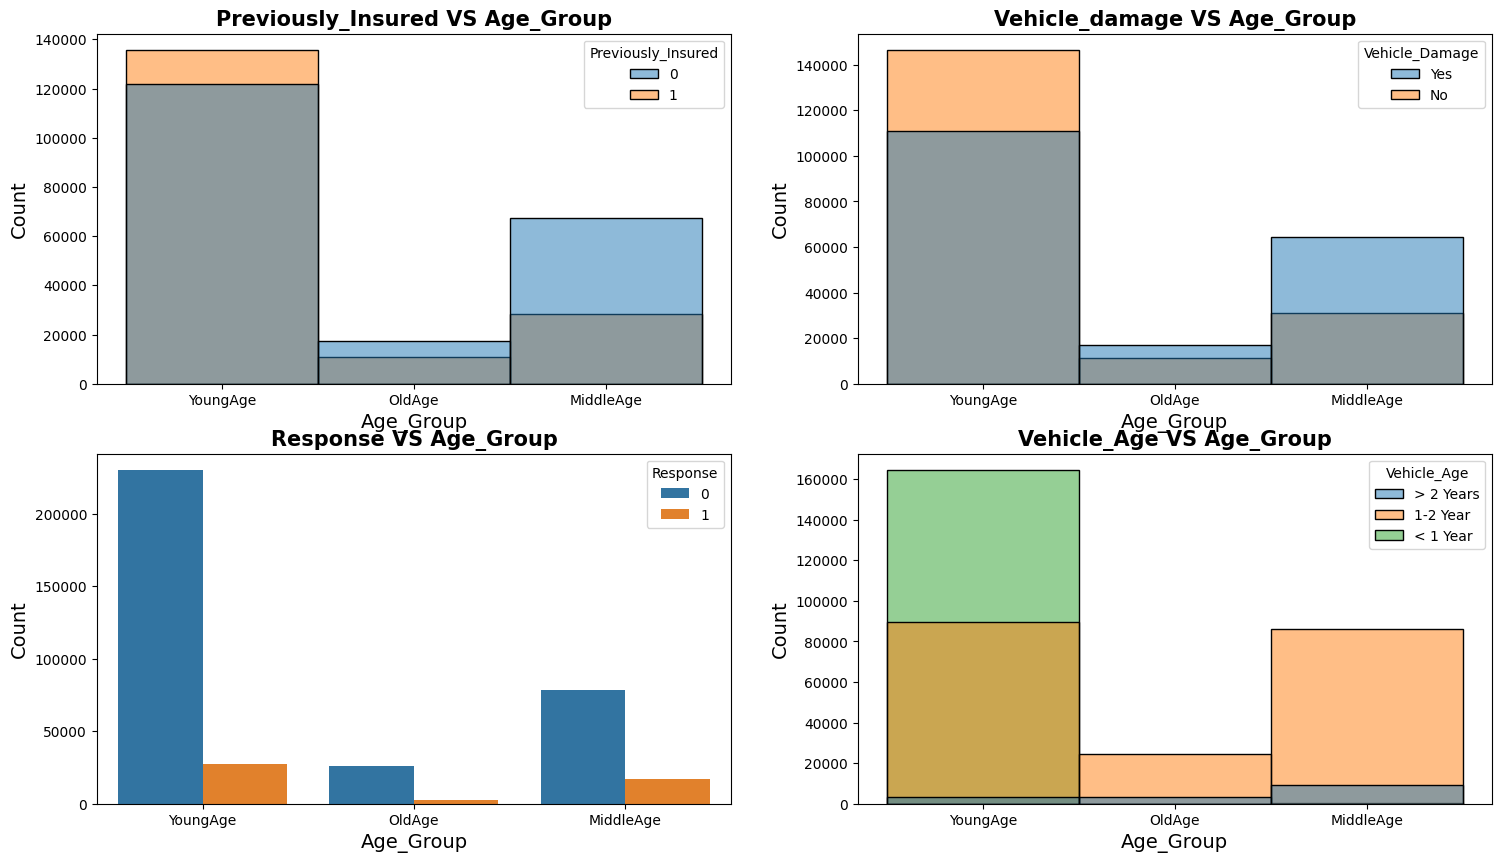

In [52]:
def age_relation(data):
  fig, axes = plt.subplots(2,2, figsize=(18,10))
  sns.histplot(ax=axes[0][0], x=data['Age_Group'], data=data, hue='Previously_Insured')
  axes[0][0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
  axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0][0].set_title('Previously_Insured VS Age_Group',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.histplot(ax=axes[0][1], x=data['Age_Group'], data=data, hue='Vehicle_Damage')
  axes[0][1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
  axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0][1].set_title('Vehicle_damage VS Age_Group',fontdict={'fontsize': 15,  'fontweight' :'bold'})

  sns.countplot(ax=axes[1][0], x=data['Age_Group'], hue='Response', data=data)
  axes[1][0].set_xlabel(xlabel='Age_Group', fontdict={'fontsize': 14})
  axes[1][0].set_ylabel(ylabel='Count', fontdict={'fontsize': 14})
  axes[1][0].set_title('Response VS Age_Group', fontdict={'fontsize': 15, 'fontweight': 'bold'})

  sns.histplot(ax=axes[1][1], x=data['Age_Group'], data=data, hue='Vehicle_Age')
  axes[1][1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
  axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[1][1].set_title('Vehicle_Age VS Age_Group',fontdict={'fontsize': 15,  'fontweight' :'bold'})

age_relation(data)

###Observation (Age_Group):
1.   Young customers are mostly have previously insured for Vehicle although the rate is only 60%. where middle aged and old people are the one with no Insurence(May become target).
2.  Middle aged and old people are highly prone for Vehicle damage although their Vehile age is also 1 year or more. On the other hand young customer Vehicle damage rate is 40% and they highly prefer Vehicle with age <1 year.



### Annual Premium relation:

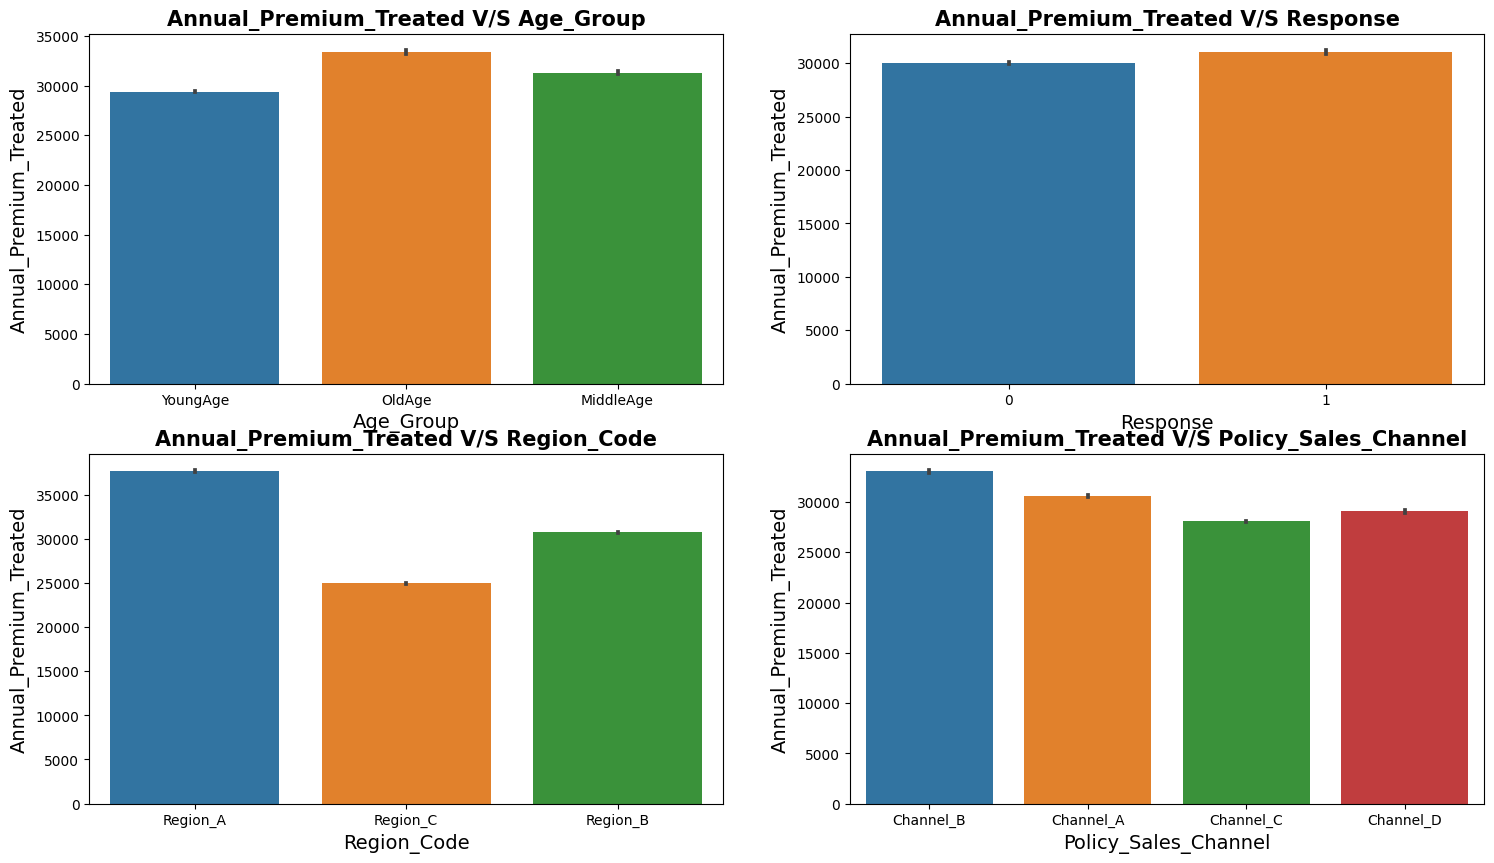

In [42]:
def Annual_Premium(data):
  fig, axes = plt.subplots(2,2, figsize=(18,10))
  sns.barplot(x='Age_Group', y='Annual_Premium_Treated', data=data, ax=axes[0, 0])
  axes[0, 0].set_xlabel('Age_Group', fontdict={'fontsize': 14})
  axes[0, 0].set_ylabel('Annual_Premium_Treated', fontdict={'fontsize': 14})
  axes[0, 0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight': 'bold'})

  sns.barplot(x='Response', y='Annual_Premium_Treated', data=data, ax=axes[0, 1])
  axes[0, 1].set_xlabel('Response', fontdict={'fontsize': 14})
  axes[0, 1].set_ylabel('Annual_Premium_Treated', fontdict={'fontsize': 14})
  axes[0, 1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight': 'bold'})

  sns.barplot(x='Region_Code_Categorical', y='Annual_Premium_Treated', data=data, ax=axes[1, 0])
  axes[1, 0].set_xlabel('Region_Code', fontdict={'fontsize': 14})
  axes[1, 0].set_ylabel('Annual_Premium_Treated', fontdict={'fontsize': 14})
  axes[1, 0].set_title('Annual_Premium_Treated V/S Region_Code', fontdict={'fontsize': 15, 'fontweight': 'bold'})

  sns.barplot(x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated', data=data, ax=axes[1, 1])
  axes[1, 1].set_xlabel('Policy_Sales_Channel', fontdict={'fontsize': 14})
  axes[1, 1].set_ylabel('Annual_Premium_Treated', fontdict={'fontsize': 14})
  axes[1, 1].set_title('Annual_Premium_Treated V/S Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight': 'bold'})


Annual_Premium(data)
# Show the plot
plt.show()


###Observation (Annual Premium):
#### There is no such impact of perticular factor on Annual_premium.

In [43]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Age_Group', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical'],
      dtype='object')

<ipython-input-53-83626e2ffda9>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupPolicySalesBySum=data.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()


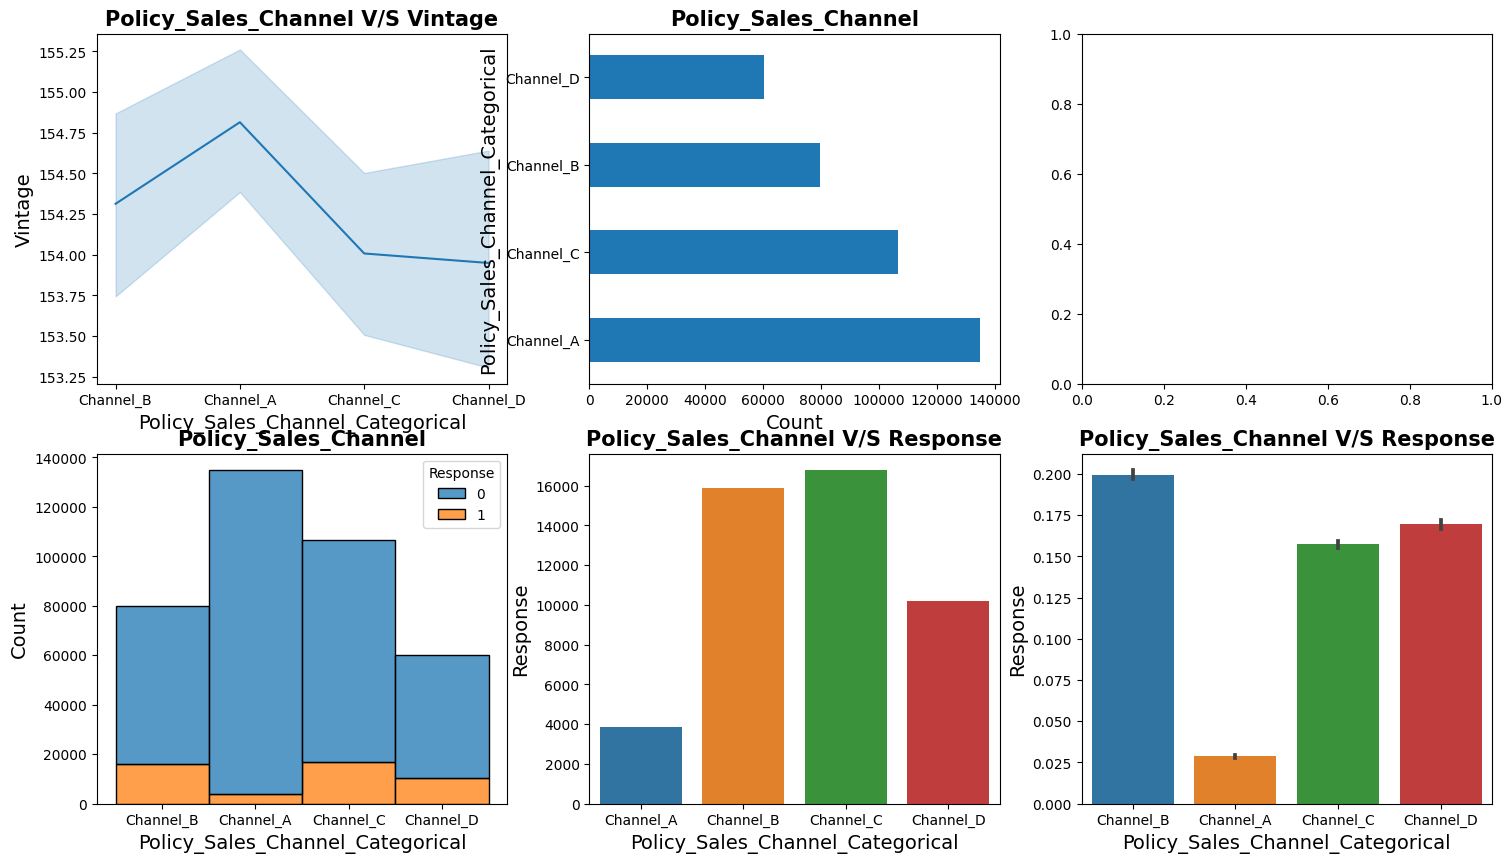

In [53]:
def show_policy_sales_channel_relation(data):

    fig, axes = plt.subplots(2,3, figsize=(18,10))

    sns.lineplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=data)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    data['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][1] ,kind='barh')
    axes[0][1].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=data, stat="count",
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=data.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=data)
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

show_policy_sales_channel_relation(data)

### Observation Policy_channel:
1.  Policy channel A has highest loyal customers with least intersted rate in getting a Vehicle Insurance



### Feature selection:

In [55]:
# Droping unwanted columns:
bin = ['id', 'Age', 'Driving_License',
                'Region_Code', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']
data.drop(columns = bin, inplace = True)

KeyError: ignored

In [56]:
data.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Age_Group',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')